See if the xmm lightcurves are any good

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/'

In [3]:
fitsfiles = glob.glob(path+'*.FTZ')
fitsfiles

['/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR8001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR8002.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR800F.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR8001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR8002.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR800F.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301R1S004SRCTSR0001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301R2S005SRCTSR0001.FTZ']

In [4]:
for ft in fitsfiles:
    print (ft)
    data = fits.getdata(ft, 1)
    print(data.names)

/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR8001.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE']
/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR8002.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE']
/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNS001SRCTSR800F.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE']
/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR8001.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE', 'RATE1', 'RATE1_ERR', 'BACK1V', 'BACK1E', 'RATE2', 'RATE2_ERR', 'BACK2V', 'BACK2E', 'RATE3', 'RATE3_ERR', 'BACK3V', 'BACK3E', 'RATE4', 'RATE4_ERR', 'BACK4V', 'BACK4E', 'RATE5', 'RATE5_ERR', 'BACK5V', 'BACK5E', 'EXP_ID', 'TIMEDEL']
/media/david/5tb_storage1/cc_cet/xmm/lightcurve/0810231301/pps/P0810231301PNX000SRCTSR8002.FTZ
['TIME', 'RATE', 'ERROR', 'FRACEXP', 'BACKV', 'BACKE', 'RATE1', 'RATE1_ERR

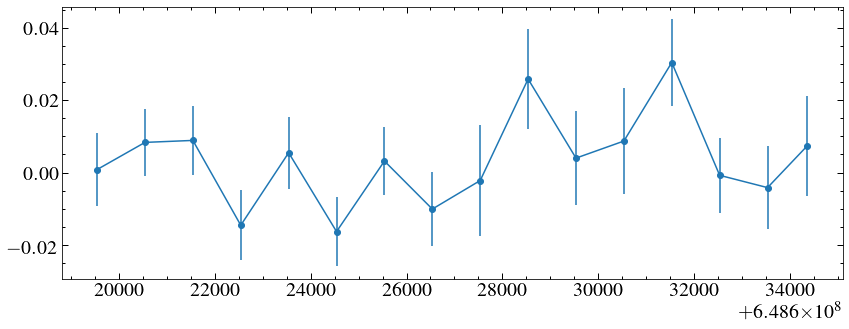

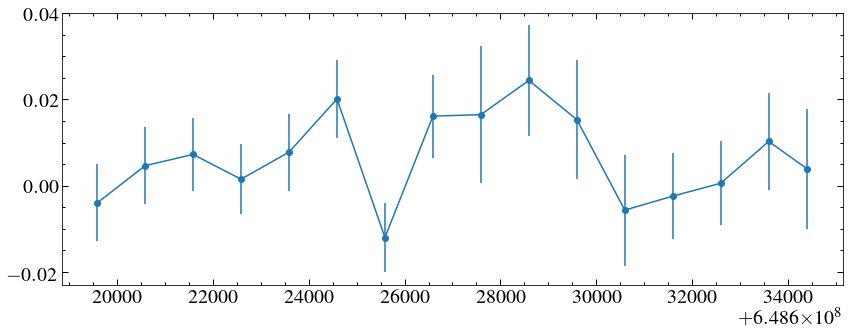

In [5]:
for ft in fitsfiles:
    inst = fits.getheader(ft, 1)['INSTRUME']
    #print(inst)
    if inst[:-1] =='RGS':
        data = fits.getdata(ft, 1)
        plt.errorbar(data['TIME'], data['RATE'], yerr=data['ERROR'], marker='o')
       # plt.hist(data['RATE'], bins=10)
        plt.show()

In [7]:
path = '/media/david/5tb_storage1/cc_cet/xmm/spectra/0810231301/pps/'

In [11]:
fitsfiles = glob.glob(path+'*SRSPEC*.FTZ')
fitsfiles

['/media/david/5tb_storage1/cc_cet/xmm/spectra/0810231301/pps/P0810231301PNS001SRSPEC0001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/spectra/0810231301/pps/P0810231301PNS001SRSPEC0002.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/spectra/0810231301/pps/P0810231301PNS001SRSPEC000F.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/spectra/0810231301/pps/P0810231301R1S004SRSPEC1001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/spectra/0810231301/pps/P0810231301R1S004SRSPEC2001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/spectra/0810231301/pps/P0810231301R2S005SRSPEC1001.FTZ',
 '/media/david/5tb_storage1/cc_cet/xmm/spectra/0810231301/pps/P0810231301R2S005SRSPEC2001.FTZ']

In [12]:
hdul = fits.open(fitsfiles[0])
hdul.info()

Filename: /media/david/5tb_storage1/cc_cet/xmm/spectra/0810231301/pps/P0810231301PNS001SRSPEC0001.FTZ
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   ()      
  1  SPECTRUM      1 BinTableHDU    100   4096R x 4C   [I, J, I, I]   
  2  REGION        1 BinTableHDU     23   1R x 4C   [16A, E, E, E]   
  3  GTI00005      1 BinTableHDU     22   1R x 2C   [D, D]   
  4  GTI00105      1 BinTableHDU     22   1R x 2C   [D, D]   
  5  GTI00205      1 BinTableHDU     22   1R x 2C   [D, D]   
  6  GTI00305      1 BinTableHDU     22   1R x 2C   [D, D]   
  7  GTI00405      1 BinTableHDU     22   1R x 2C   [D, D]   
  8  GTI00505      1 BinTableHDU     22   1R x 2C   [D, D]   
  9  GTI00605      1 BinTableHDU     22   1R x 2C   [D, D]   
 10  GTI00705      1 BinTableHDU     22   1R x 2C   [D, D]   
 11  GTI00805      1 BinTableHDU     22   1R x 2C   [D, D]   
 12  GTI00905      1 BinTableHDU     22   1R x 2C   [D, D]   
 13  GTI01005      1 Bin

In [13]:
hdul[1].data.names

['CHANNEL', 'COUNTS', 'GROUPING', 'QUALITY']

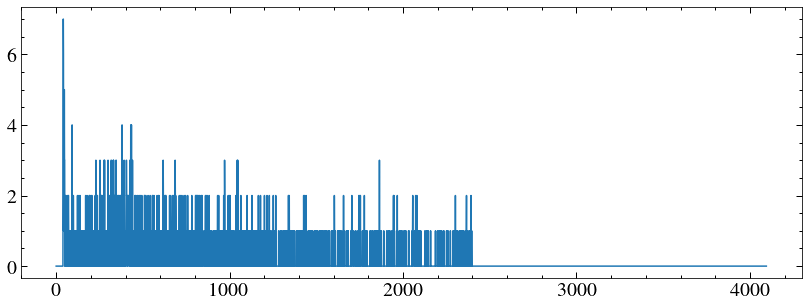

In [14]:
data = hdul[1].data
plt.plot(data['CHANNEL'], data['COUNTS'])

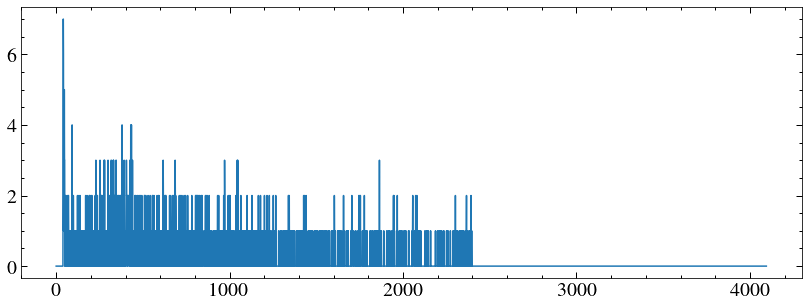

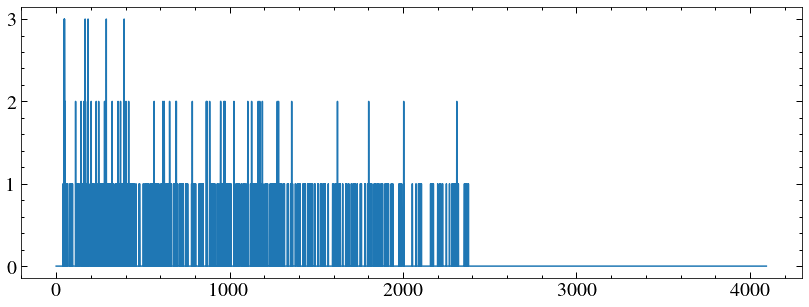

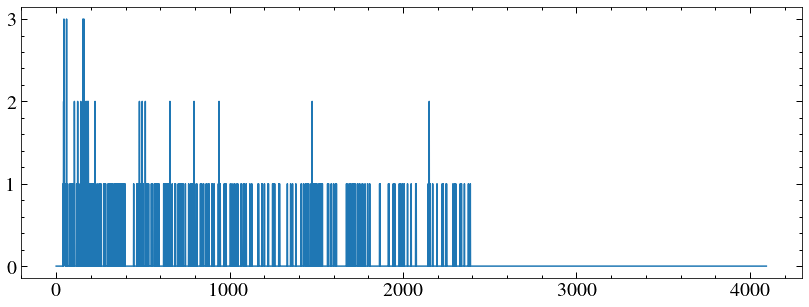

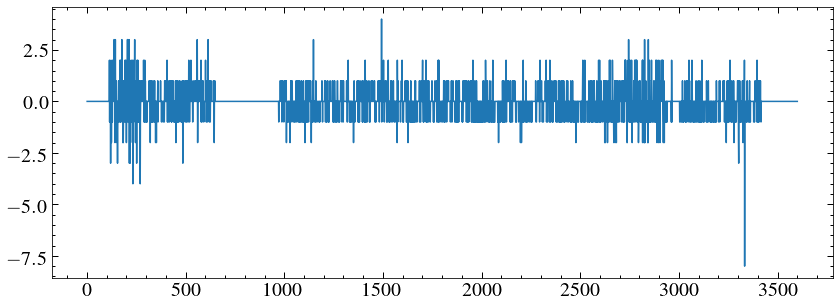

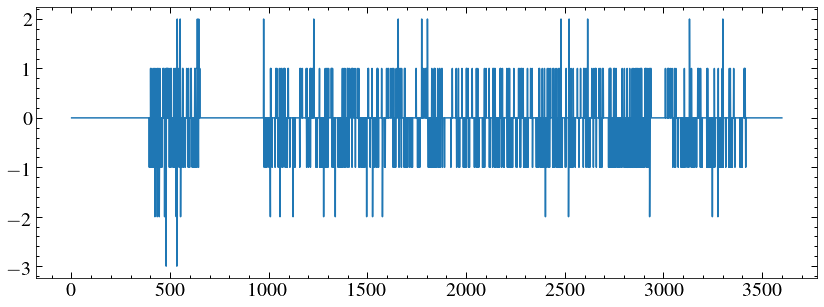

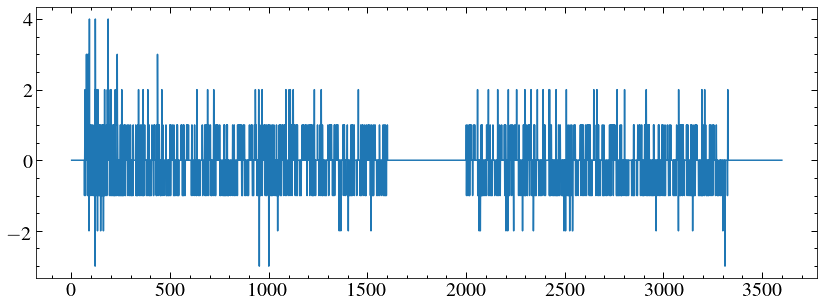

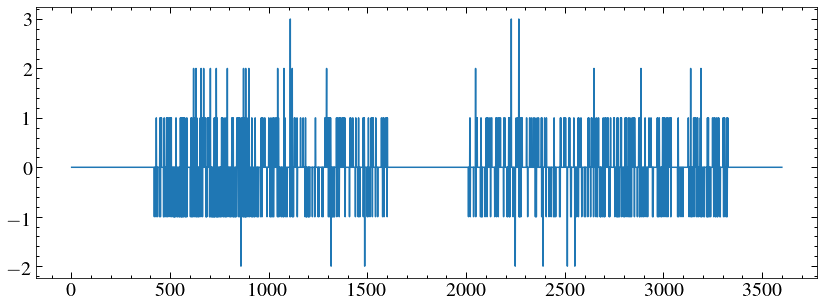

In [15]:
for ft in fitsfiles:
    data = fits.getdata(ft, 1)
    plt.plot(data['CHANNEL'], data['COUNTS'])
    plt.show()